In [2]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.special as sps
import arviz

In [3]:
sns.set()  # Nice plot aesthetic
np.random.seed(101)

In [53]:
# build a model
# N(0.5 * rand.NormFloat64(), 1 + 0.5*rand.NormFloat64())
model = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real<lower=0> beta;
    real<lower=0> alpha;
    
}
model {
    beta ~ lognormal(1, 1);
    alpha ~ lognormal(1, 1);
    y ~ gamma(beta,alpha);
}
"""

### Data generation
#### Here we will specify the ‘ground truth’ values of our parameters which we’ll aim to reproduce using Stan, and generate data from these parameters using numpy, making sure to add Gaussian noise.


In [27]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
y = np.random.gamma(shape, scale, 100)

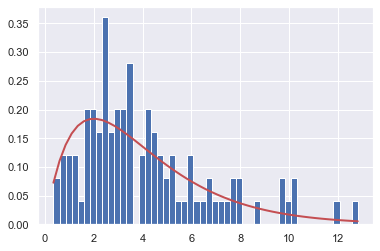

In [28]:
# Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(y, 50, density=True)
t = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
plt.plot(bins, t, linewidth=2, color='r')
plt.show()

In [7]:
# Put our data in a dictionary
data = {'N': len(y), 'y': y}

In [54]:
# Compile the model
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_83f090dd464c371ad3043f22ef808af7 NOW.


In [55]:
# Train the model and generate samples
fit = sm.sampling(data=data, chains=4, iter=2000, n_jobs=1)

### Posterior Distribution Learned

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267C723B648>,
      dtype=object)

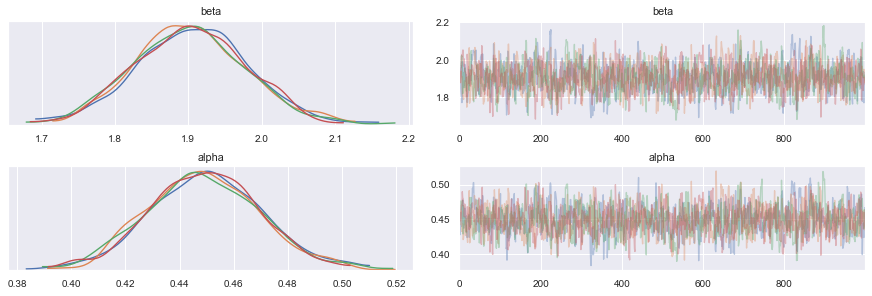

In [56]:
#  Model analysisfit = sm.sampling(data=data, chains=4, iter=2000, n_jobs=1)
arviz.plot_trace(fit)
# trace of mu gives us how the values of mu changes over each iteration/sample.
# Similarly, the distribution of mu gives us the uncertainty in our mu estimates in the samples.

In [57]:
# summary
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'],
                  columns=summary_dict['summary_colnames'],
                  index=summary_dict['summary_rownames'])

df


mean   se_mean        sd         2.5%          25%          50%  \
beta      1.903750  0.002257  0.075847     1.760827     1.851270     1.902666   
alpha     0.449394  0.000596  0.020498     0.410174     0.435352     0.449215   
lp__  -2346.097655  0.025260  0.943275 -2348.621033 -2346.478481 -2345.808853   

               75%        97.5%        n_eff      Rhat  
beta      1.952946     2.055975  1129.635953  1.000228  
alpha     0.463157     0.491358  1183.305927  0.999800  
lp__  -2345.417228 -2345.158610  1394.484360  1.000549